In [189]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import mplfinance as mpf
import numpy as np
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'talib'

# 1. Listed Companies Analysis

In [2]:
companies = pd.read_csv('Data/stock_metadata.csv')
companies.head()

,Company Name,Industry,Symbol,Series,ISIN Code
0,Adani Ports and Special Economic Zone Ltd.,SERVICES,ADANIPORTS,EQ,INE742F01042
1,Asian Paints Ltd.,CONSUMER GOODS,ASIANPAINT,EQ,INE021A01026
2,Axis Bank Ltd.,FINANCIAL SERVICES,AXISBANK,EQ,INE238A01034
3,Bajaj Auto Ltd.,AUTOMOBILE,BAJAJ-AUTO,EQ,INE917I01010
4,Bajaj Finserv Ltd.,FINANCIAL SERVICES,BAJAJFINSV,EQ,INE918I01018


In [3]:
from pandasql import sqldf
pysql = lambda q:sqldf(q, globals())

In [4]:
steel_companies_query = """SELECT `Company Name` as Steel_Companies_in_Nifty_50_Dataset FROM companies WHERE Industry = 'METALS';"""

In [5]:
steel_companies = pysql(steel_companies_query)

## What are the different Steel Companies represented in dataset?

In [6]:
steel_companies

,Steel_Companies_in_Nifty_50_Dataset
0,Coal India Ltd.
1,Hindalco Industries Ltd.
2,JSW Steel Ltd.
3,Tata Steel Ltd.
4,Vedanta Ltd.


# 2. EDA - Exploratory Data Analysis

## Read data

In [11]:
stock_data_list = [('coal_india','Data/COALINDIA TRAIN.csv'),
              ('hindalco','Data/HINDALCO TRAIN.csv'),
              ('jsw_steel','Data/JSWSTEEL TRAIN.csv'),
              ('tata_steel','Data/TATASTEEL TRAIN.csv'),
              ('vedanta','Data/VEDANTA TRAIN.csv')]

In [12]:
stock_data = []
for symbol, filename in stock_data_list:
    data = pd.read_csv(filename)
    data['Symbol'] = symbol
    stock_data.append(data)

In [13]:
dataset = pd.concat(stock_data,ignore_index=True)

In [14]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,03-01-2011,315.500000,318.000000,314.549988,317.299988,129.144241,2929118.0,coal_india
1,04-01-2011,318.899994,320.000000,316.049988,319.200012,129.917557,2716995.0,coal_india
2,05-01-2011,320.000000,320.000000,308.250000,309.799988,126.091690,8555905.0,coal_india
3,06-01-2011,311.000000,313.000000,308.500000,309.100006,125.806793,2763146.0,coal_india
4,07-01-2011,310.000000,313.500000,302.149994,309.100006,125.806793,2298583.0,coal_india
...,...,...,...,...,...,...,...,...
14820,2022-12-26,285.750000,297.450012,281.799988,296.100006,248.103073,7669940.0,vedanta
14821,2022-12-27,299.100006,309.000000,299.000000,307.649994,257.780853,11251874.0,vedanta
14822,2022-12-28,306.950012,306.950012,304.100006,304.899994,255.476593,5313187.0,vedanta
14823,2022-12-29,303.049988,308.500000,301.049988,307.100006,257.320007,6837877.0,vedanta


## Checking null values

In [15]:
dataset.isna().sum()

Date          0
Open         30
High         30
Low          30
Close        30
Adj Close    30
Volume       30
Symbol        0
dtype: int64

In [19]:
null_rows = dataset[dataset.isnull().any(axis=1)].head(7)
null_rows 

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
251,07-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
290,03-03-2012,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
420,08-09-2012,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
462,11-11-2012,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
799,22-03-2014,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
1028,28-02-2015,NaN,NaN,NaN,NaN,NaN,NaN,coal_india
3216,07-01-2012,NaN,NaN,NaN,NaN,NaN,NaN,hindalco


### Droping null values

In [20]:
dataset.dropna(inplace=True)
dataset.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Symbol       0
dtype: int64

## Shape

In [80]:
dataset.shape

(14795, 8)

## Datatype

In [82]:
dataset.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Symbol        object
dtype: object

In [87]:
dataset['Date'] = pd.to_datetime(dataset['Date'], format='%d-%m-%Y')

In [89]:
dataset.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
Symbol               object
dtype: object

## describe()

In [90]:
symbol_stats = dataset.groupby('Symbol').describe()
for symbol in symbol_stats.index:
    print(f"Descriptive Statistics for {symbol}:")
    print(symbol_stats.loc[symbol])
    print("\n")

Descriptive Statistics for coal_india:
Open       count    2.959000e+03
           mean     2.727980e+02
           std      7.923306e+01
           min      1.108500e+02
           25%      2.113750e+02
           50%      2.861500e+02
           75%      3.340000e+02
           max      4.450000e+02
High       count    2.959000e+03
           mean     2.762793e+02
           std      8.018361e+01
           min      1.124500e+02
           25%      2.134250e+02
           50%      2.892500e+02
           75%      3.384250e+02
           max      4.471000e+02
Low        count    2.959000e+03
           mean     2.690158e+02
           std      7.826744e+01
           min      1.095500e+02
           25%      2.070750e+02
           50%      2.822500e+02
           75%      3.297750e+02
           max      4.370000e+02
Close      count    2.959000e+03
           mean     2.725367e+02
           std      7.921841e+01
           min      1.105500e+02
           25%      2.112000e+02
    

## Correlation

array([[<AxesSubplot:xlabel='CoalIndia', ylabel='CoalIndia'>,
        <AxesSubplot:xlabel='HindalCo', ylabel='CoalIndia'>,
        <AxesSubplot:xlabel='JSWSteel', ylabel='CoalIndia'>,
        <AxesSubplot:xlabel='TataSteel', ylabel='CoalIndia'>,
        <AxesSubplot:xlabel='Vendanta', ylabel='CoalIndia'>],
       [<AxesSubplot:xlabel='CoalIndia', ylabel='HindalCo'>,
        <AxesSubplot:xlabel='HindalCo', ylabel='HindalCo'>,
        <AxesSubplot:xlabel='JSWSteel', ylabel='HindalCo'>,
        <AxesSubplot:xlabel='TataSteel', ylabel='HindalCo'>,
        <AxesSubplot:xlabel='Vendanta', ylabel='HindalCo'>],
       [<AxesSubplot:xlabel='CoalIndia', ylabel='JSWSteel'>,
        <AxesSubplot:xlabel='HindalCo', ylabel='JSWSteel'>,
        <AxesSubplot:xlabel='JSWSteel', ylabel='JSWSteel'>,
        <AxesSubplot:xlabel='TataSteel', ylabel='JSWSteel'>,
        <AxesSubplot:xlabel='Vendanta', ylabel='JSWSteel'>],
       [<AxesSubplot:xlabel='CoalIndia', ylabel='TataSteel'>,
        <AxesSubplot:xla

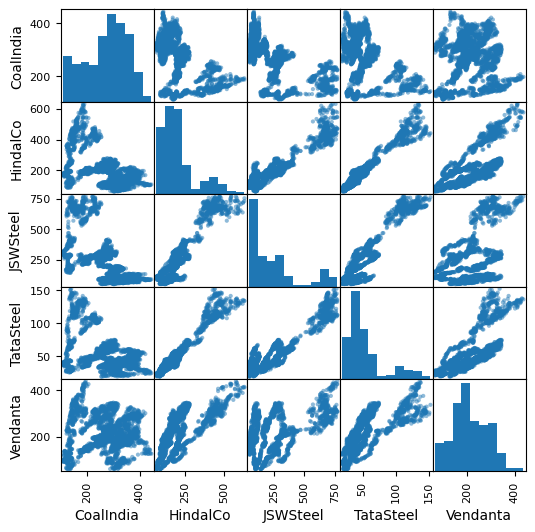

In [95]:
diff_sec_close = pd.concat([coal_data['Close'],hindalco_data['Close'],jsw_data['Close'],tata_data['Close'],vedanta_data['Close']],axis=1)
diff_sec_close.columns = ['CoalIndia', 'HindalCo', 'JSWSteel','TataSteel','Vendanta']
scatter_matrix(diff_sec_close, figsize=(6,6))

# 3.Technical Analysis

## Candle Stick Charts

In [119]:
coal_data['Date'] = pd.to_datetime(coal_data['Date'])
hindalco_data['Date'] = pd.to_datetime(hindalco_data['Date'])
jsw_data['Date'] = pd.to_datetime(jsw_data['Date'])
tata_data['Date'] = pd.to_datetime(tata_data['Date'])
vedanta_data['Date'] = pd.to_datetime(vedanta_data['Date'])

In [120]:
coal_data=coal_data.set_index('Date')
hindalco_data=hindalco_data.set_index('Date')
jsw_data=jsw_data.set_index('Date')
tata_data=tata_data.set_index('Date')
vedanta_data=vedanta_data.set_index('Date')

C:\Users\Deependra\AppData\Local\Temp\ipykernel_14692\591159759.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(coal_data['2022'],type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 CoalIndia STOCK ANALYSIS', tight_layout=True)


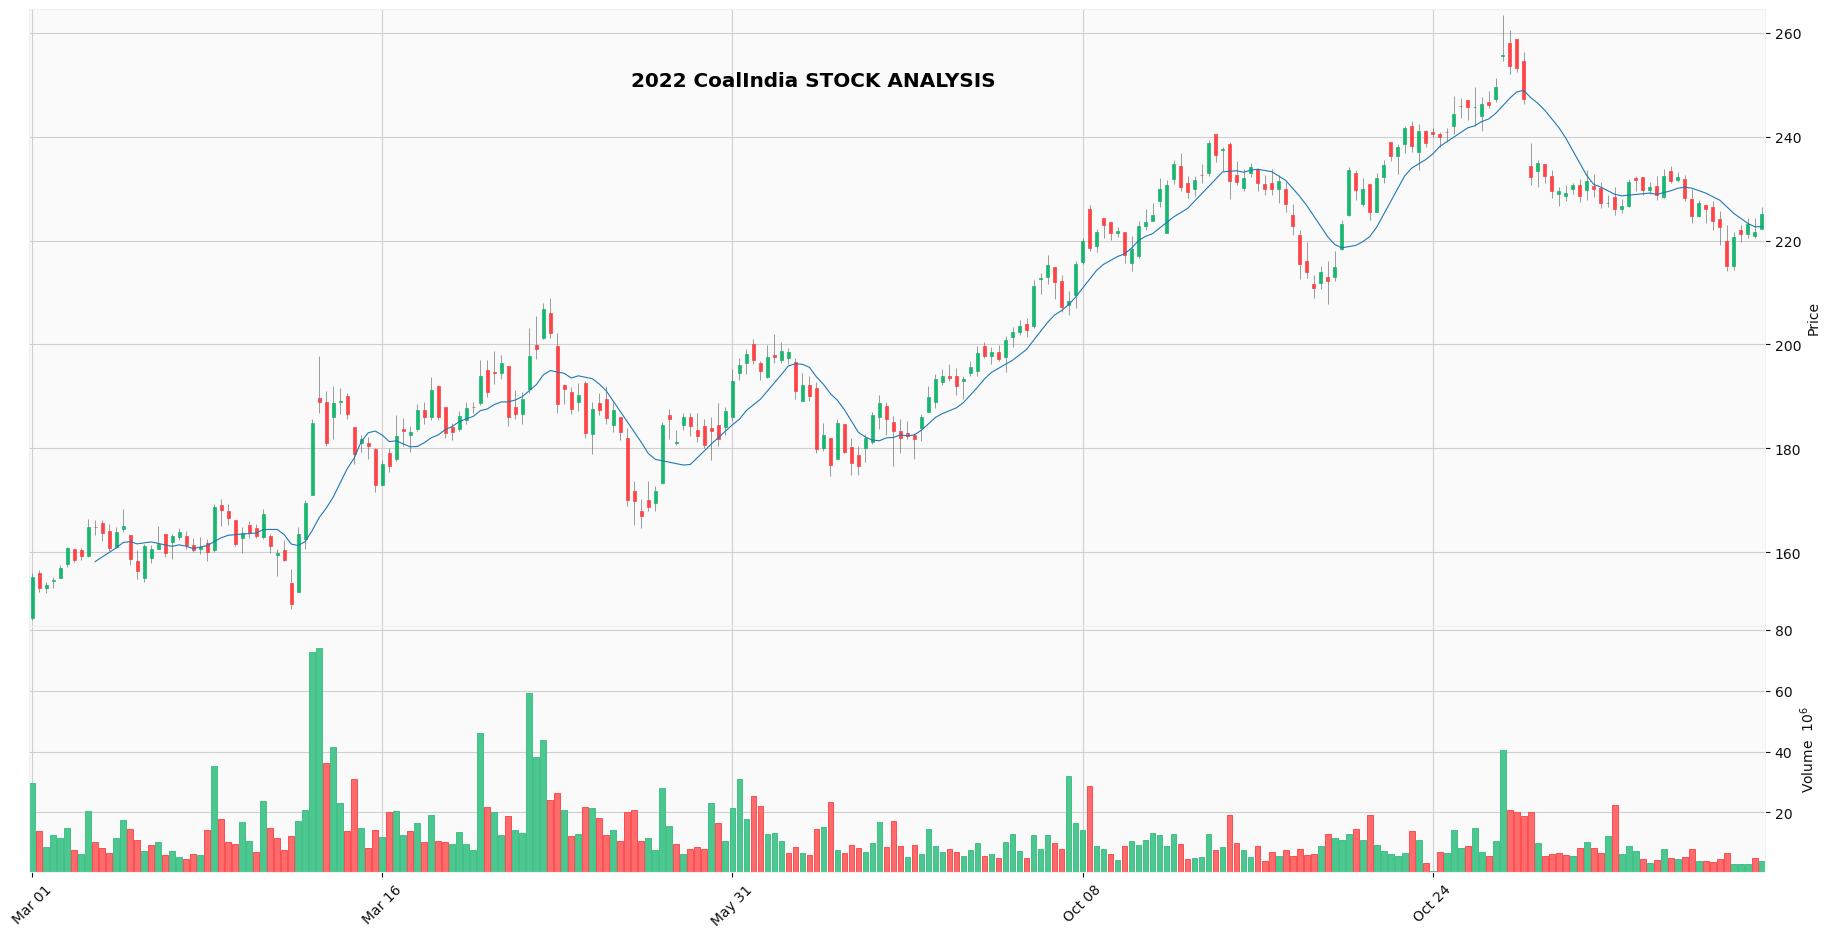

C:\Users\Deependra\AppData\Local\Temp\ipykernel_14692\591159759.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(hindalco_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 HindalCo STOCK ANALYSIS', tight_layout=True)


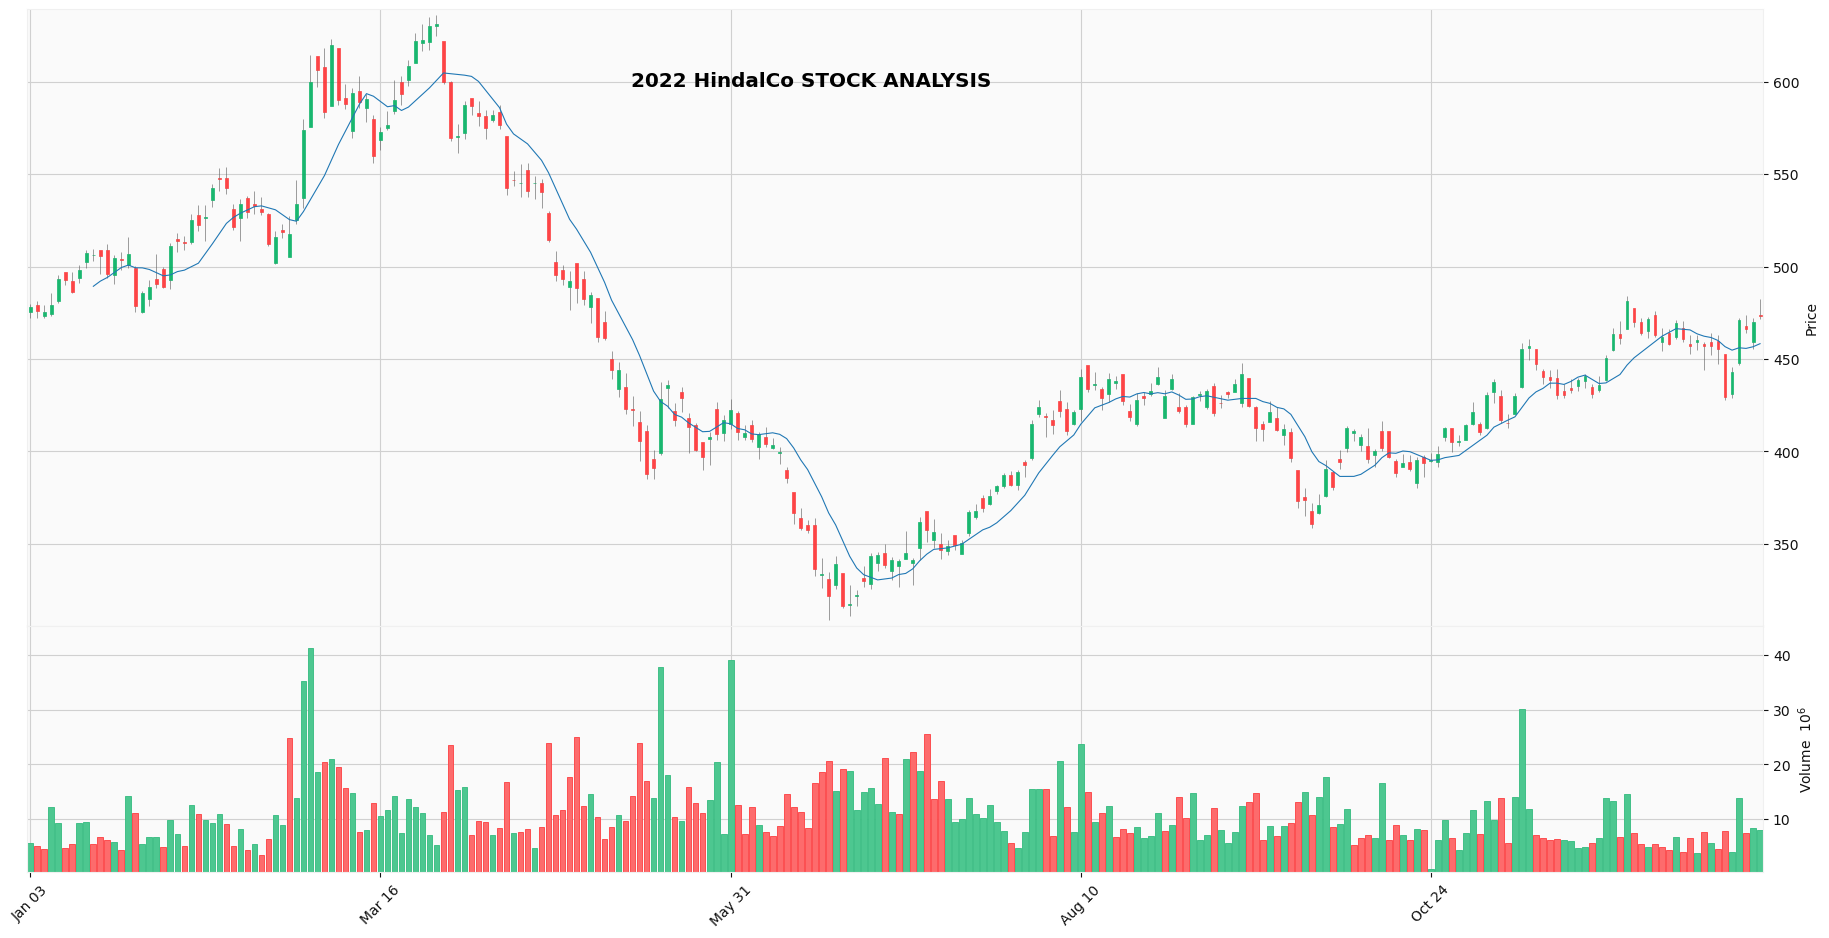

C:\Users\Deependra\AppData\Local\Temp\ipykernel_14692\591159759.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(jsw_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 JSW Steel STOCK ANALYSIS', tight_layout=True)


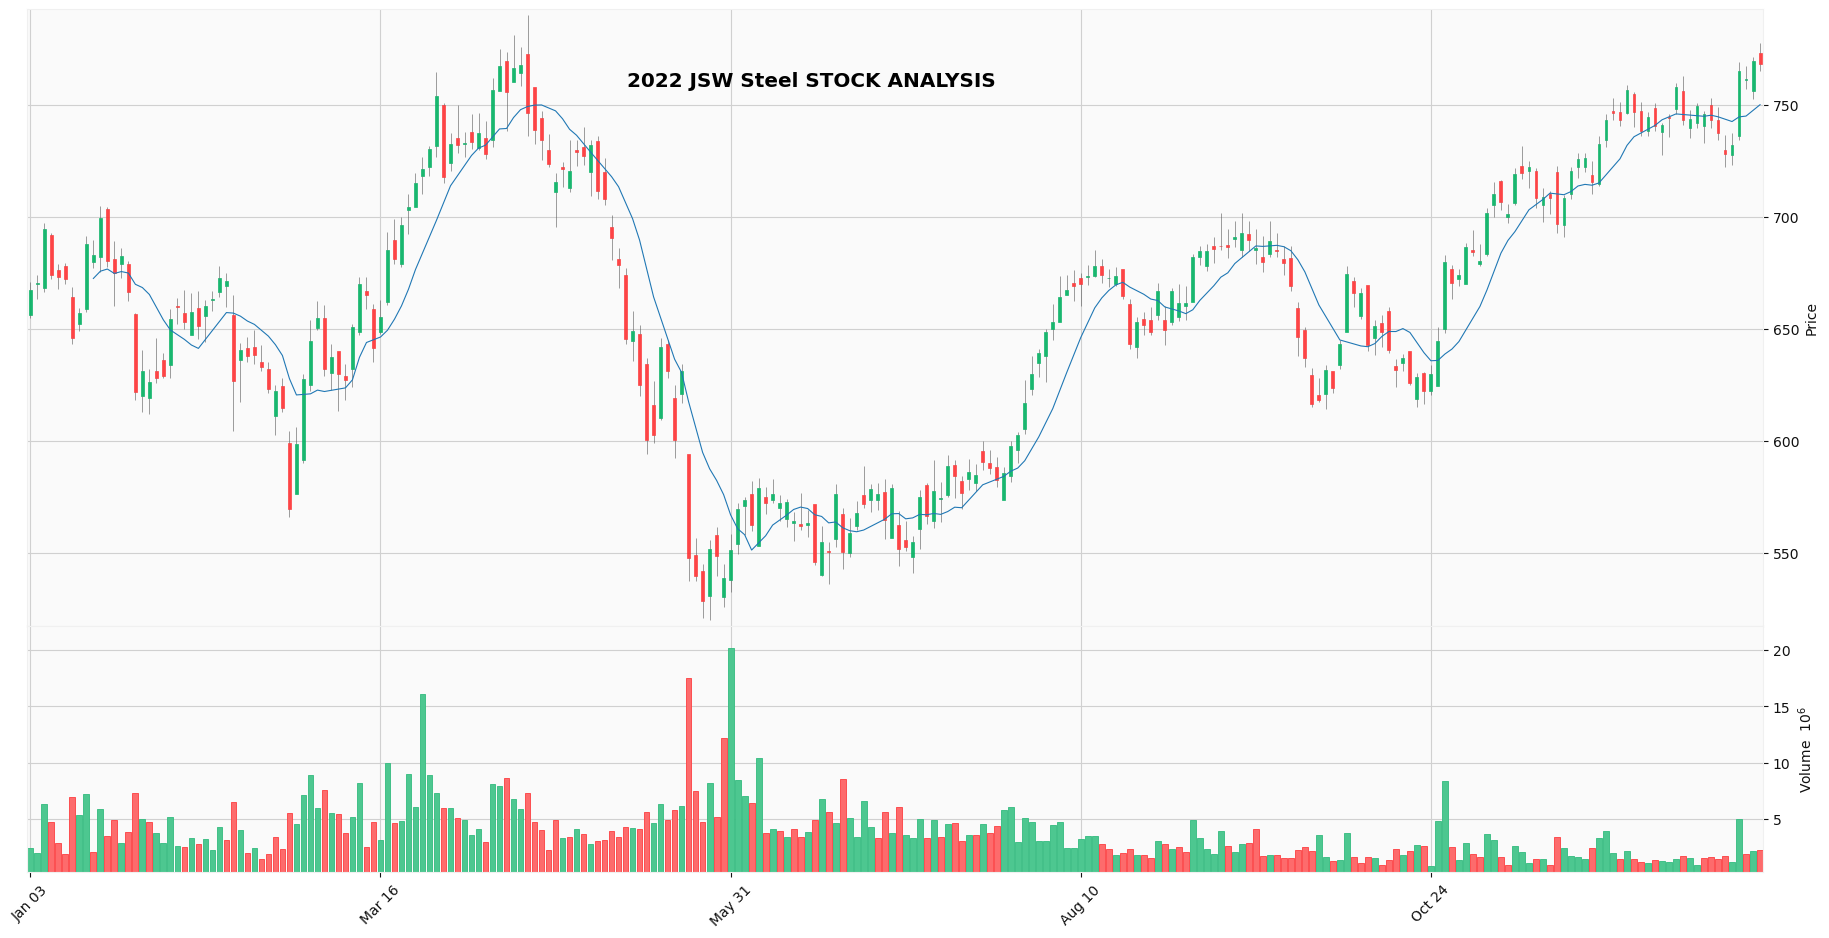

C:\Users\Deependra\AppData\Local\Temp\ipykernel_14692\591159759.py:4: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(tata_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 Tata Steel STOCK ANALYSIS', tight_layout=True)


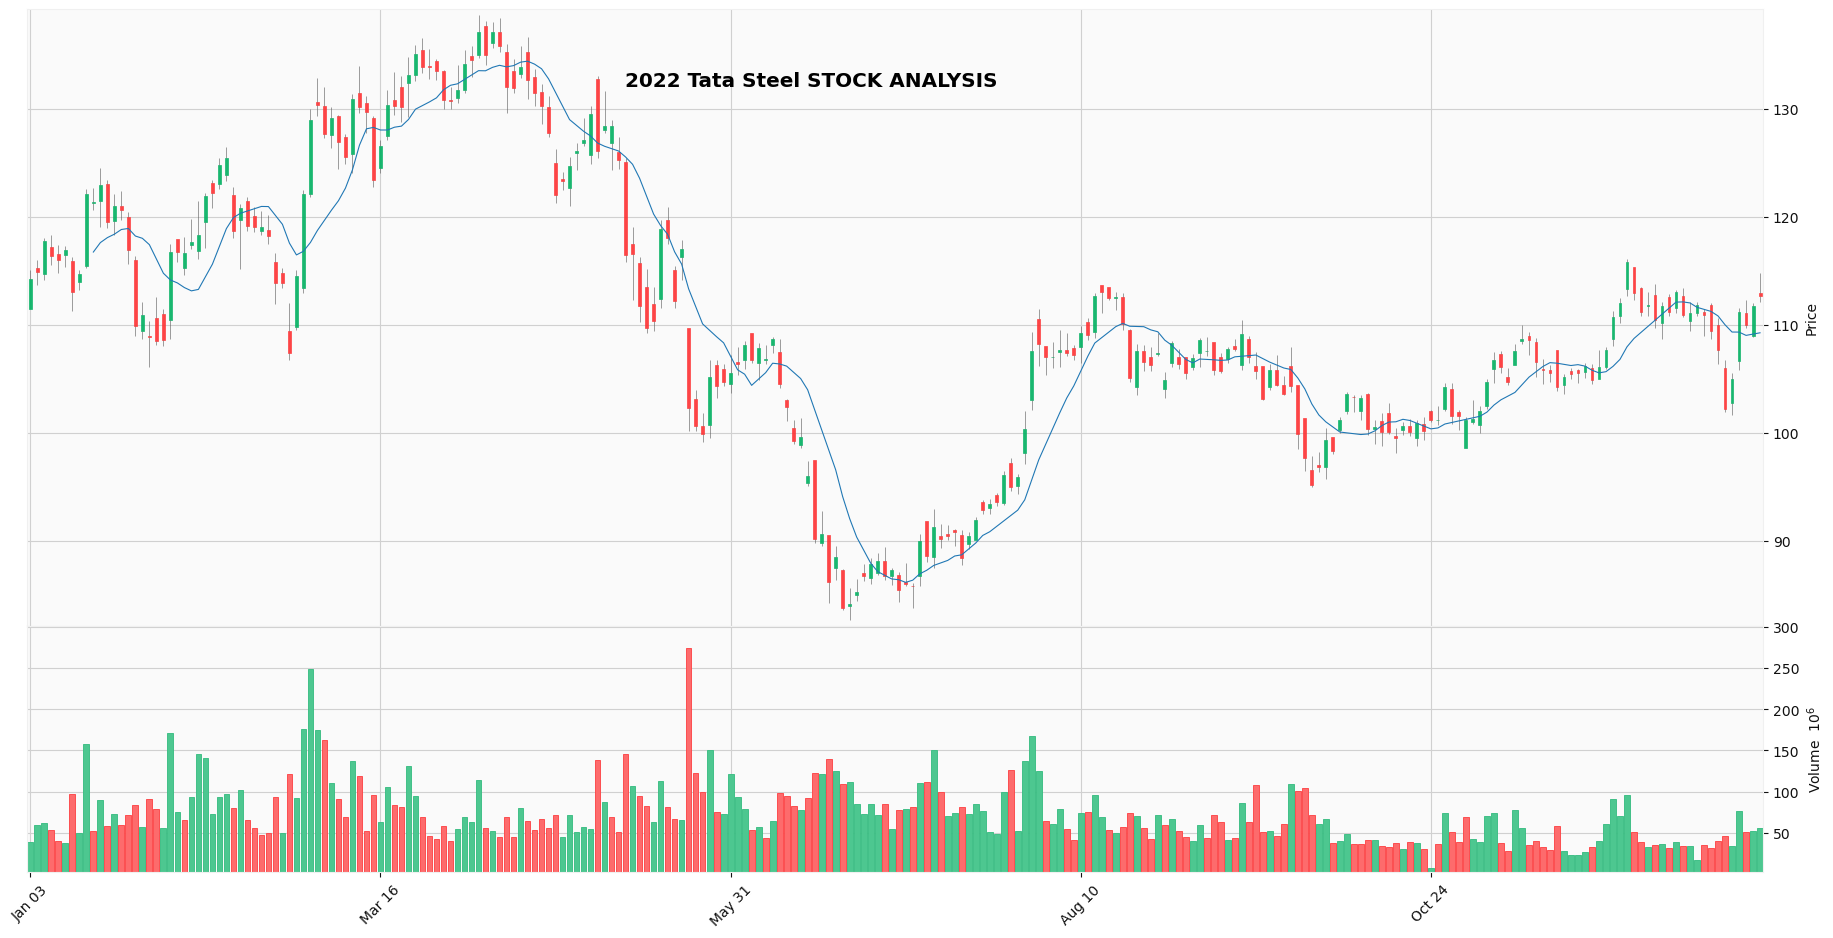

C:\Users\Deependra\AppData\Local\Temp\ipykernel_14692\591159759.py:5: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  mpf.plot(vedanta_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 Vedanta STOCK ANALYSIS', tight_layout=True)


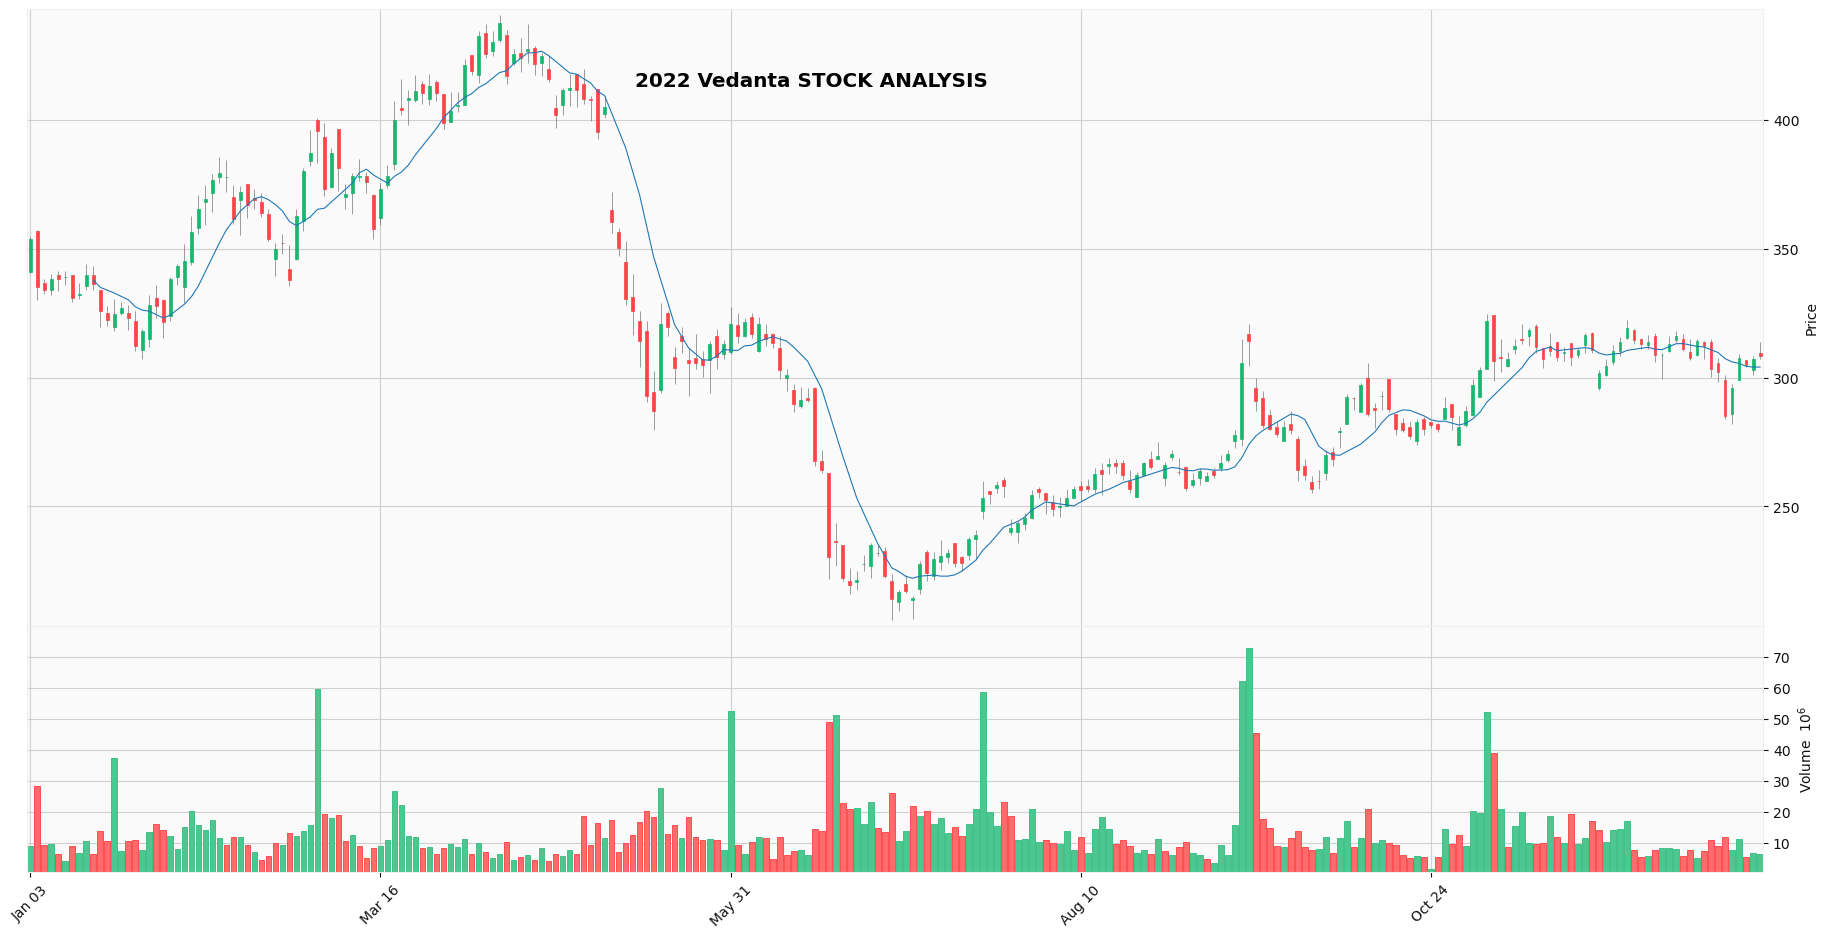

In [125]:
mpf.plot(coal_data['2022'],type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 CoalIndia STOCK ANALYSIS', tight_layout=True)
mpf.plot(hindalco_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 HindalCo STOCK ANALYSIS', tight_layout=True)
mpf.plot(jsw_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 JSW Steel STOCK ANALYSIS', tight_layout=True)
mpf.plot(tata_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 Tata Steel STOCK ANALYSIS', tight_layout=True)
mpf.plot(vedanta_data['2022'], type = 'candle',volume=True, figsize=(20,10), mav=(10), style='yahoo', title='2022 Vedanta STOCK ANALYSIS', tight_layout=True)

## %Change

In [73]:
coal_data['%Change'] = coal_data['Close'].pct_change() * 100
hindalco_data['%Change'] = hindalco_data['Close'].pct_change() * 100
jsw_data['%Change'] = jsw_data['Close'].pct_change() * 100
tata_data['%Change'] = tata_data['Close'].pct_change() * 100
vedanta_data['%Change'] = vedanta_data['Close'].pct_change() * 100

In [154]:
std_deviation_coal = np.std(coal_data['%Change'])
std_deviation_hindalco = np.std(hindalco_data['%Change'])
std_deviation_jsw = np.std(jsw_data['%Change'])
std_deviation_tata = np.std(tata_data['%Change'])
std_deviation_vedanta = np.std(vedanta_data['%Change'])
print("Coal India Std - ",std_deviation_coal)
print("Hindalco Std - ",std_deviation_hindalco)
print("JSW Steel Std - ",std_deviation_jsw)
print("Tata Steel - ", std_deviation_tata)
print("Vedanta - ", std_deviation_vedanta)

Coal India Std -  1.9268064658664386
Hindalco Std -  2.6059658508654344
JSW Steel Std -  2.4084762802457913
Tata Steel -  2.381846889852965
Vedanta -  2.843576387886839


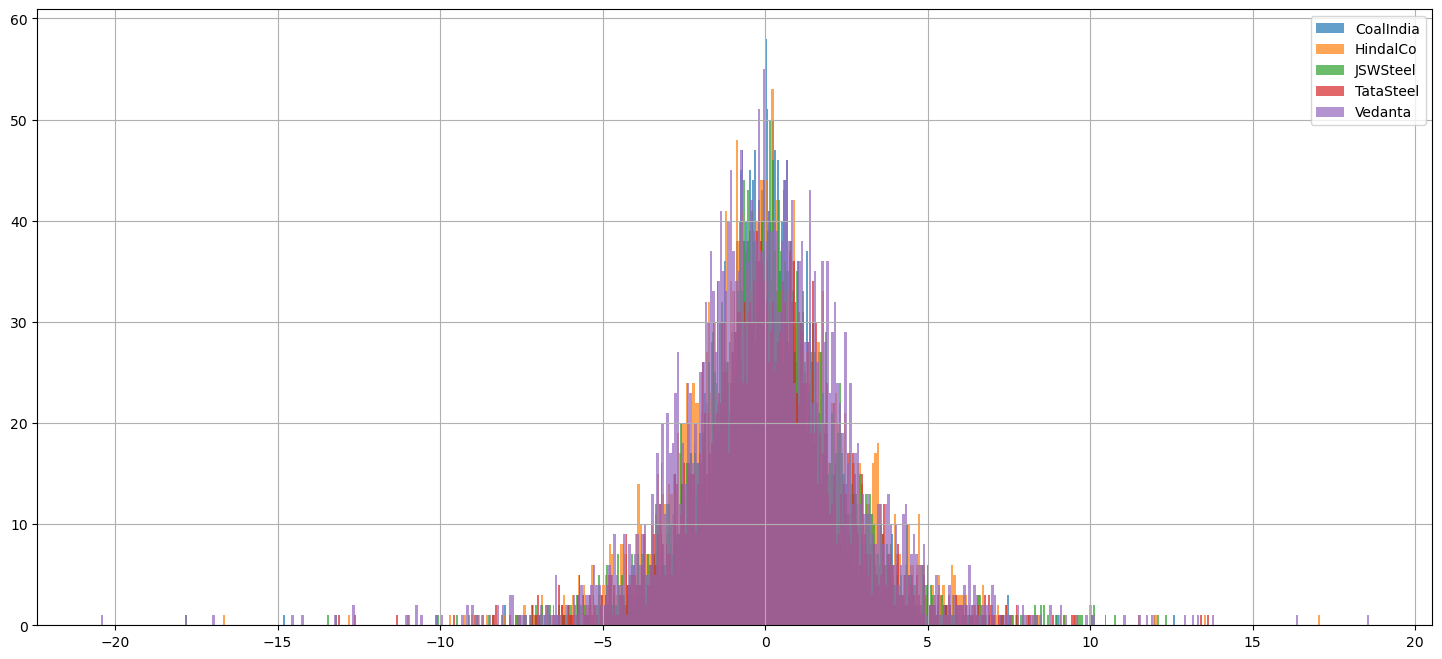

In [74]:
coal_data['%Change'].hist(bins=500, label='CoalIndia',alpha=0.7, figsize=(18,8))
hindalco_data['%Change'].hist(bins=500, label='HindalCo',alpha=0.7)
jsw_data['%Change'].hist(bins=500, label='JSWSteel',alpha=0.7)
tata_data['%Change'].hist(bins=500, label='TataSteel',alpha=0.7)
vedanta_data['%Change'].hist(bins=500, label='Vedanta',alpha=0.7)
plt.legend()

Text(0.5, 1.0, 'KDE distribution')

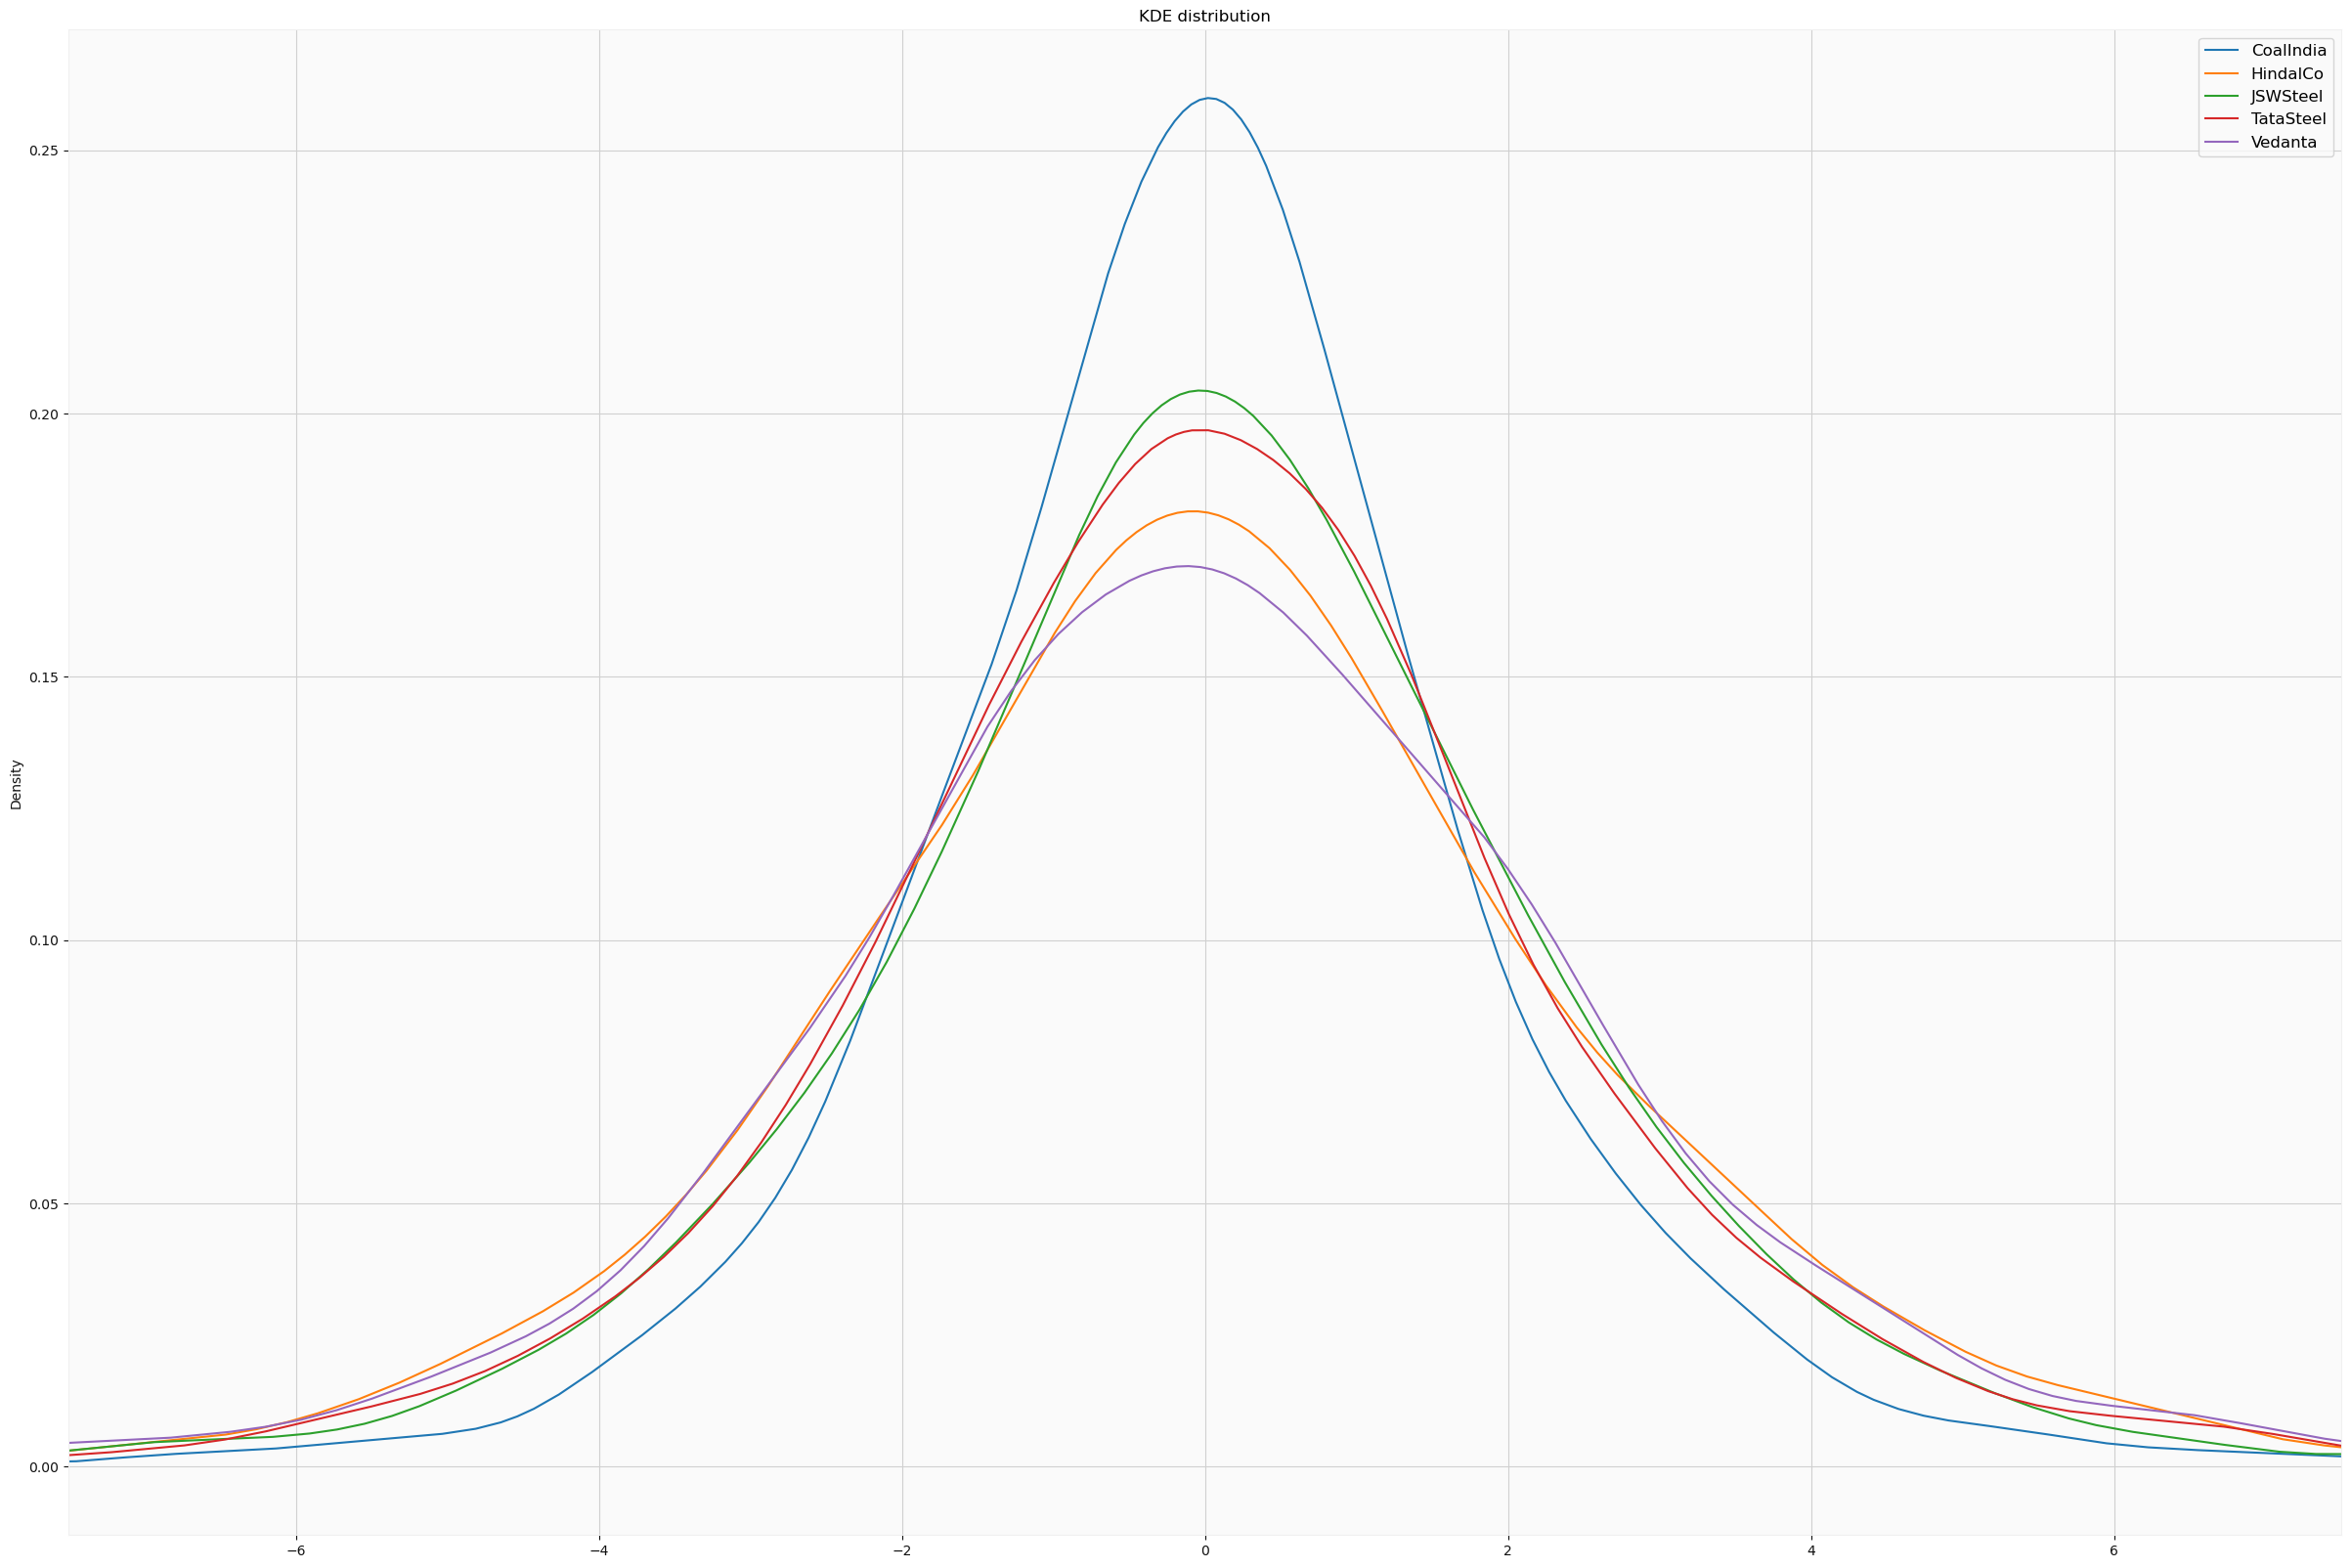

In [155]:
coal_data['%Change'].plot(kind='kde', label='CoalIndia', figsize=(30,20),xlim=(-7.5,7.5))
hindalco_data['%Change'].plot(kind='kde', label='HindalCo')
jsw_data['%Change'].plot(kind='kde', label='JSWSteel')
tata_data['%Change'].plot(kind='kde', label='TataSteel')
vedanta_data['%Change'].plot(kind='kde', label='Vedanta')
plt.legend(fontsize='large')
plt.title("KDE distribution")

<AxesSubplot:>

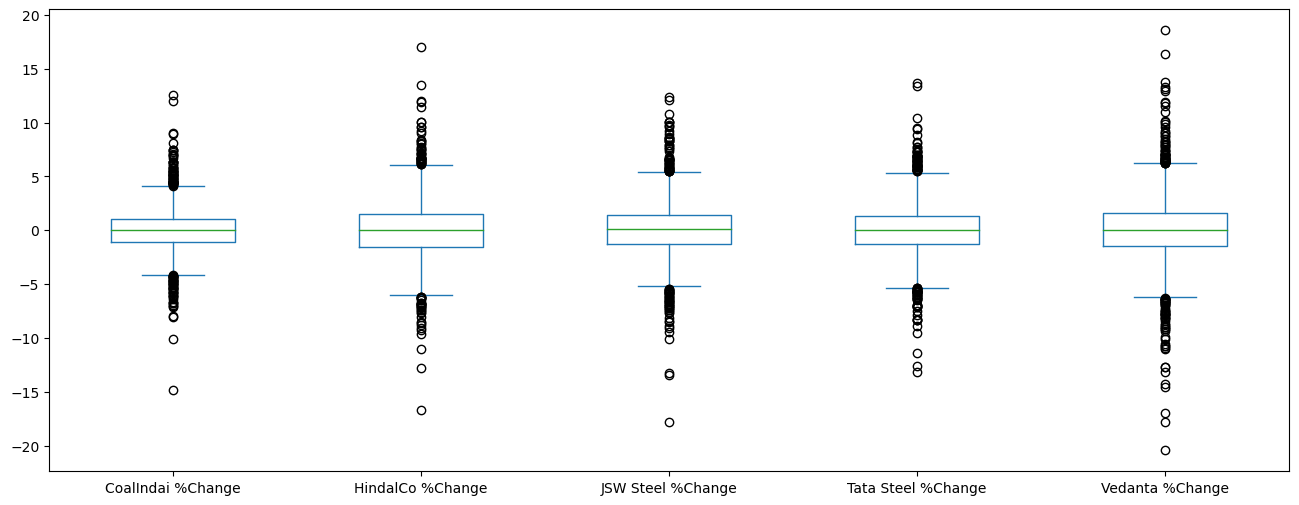

In [54]:
box = pd.concat([coal_data['%Change'], hindalco_data['%Change'], jsw_data['%Change'],tata_data['%Change'],vedanta_data['%Change']],axis=1)
box.columns = ['CoalIndai %Change', 'HindalCo %Change', 'JSW Steel %Change', 'Tata Steel %Change', 'Vedanta %Change']
box.plot(kind='box', figsize=(16,6))

## Moving Average Strategy

## Moving Average Crossover Strategy

In [164]:
coal_data['20_sma'] = coal_data['Close'].rolling(window=20).mean()
coal_data['50_sma'] = coal_data['Close'].rolling(window=50).mean()
coal_data['200_sma'] = coal_data['Close'].rolling(window=200).mean()

In [165]:
hindalco_data['20_sma'] = hindalco_data['Close'].rolling(window=20).mean()
hindalco_data['50_sma'] = hindalco_data['Close'].rolling(window=50).mean()
hindalco_data['200_sma'] = hindalco_data['Close'].rolling(window=200).mean()

In [166]:
jsw_data['20_sma'] = jsw_data['Close'].rolling(window=20).mean()
jsw_data['50_sma'] = jsw_data['Close'].rolling(window=50).mean()
jsw_data['200_sma'] = jsw_data['Close'].rolling(window=200).mean()

In [167]:
tata_data['20_sma'] = tata_data['Close'].rolling(window=20).mean()
tata_data['50_sma'] = tata_data['Close'].rolling(window=50).mean()
tata_data['200_sma'] = tata_data['Close'].rolling(window=200).mean()

In [168]:
vedanta_data['20_sma'] = vedanta_data['Close'].rolling(window=20).mean()
vedanta_data['50_sma'] = vedanta_data['Close'].rolling(window=50).mean()
vedanta_data['200_sma'] = vedanta_data['Close'].rolling(window=200).mean()

In [183]:
coal_data_df = coal_data.tail(40)
coal_data_candlestick = go.Candlestick(x=coal_data_df.index, open=coal_data_df['Open'], high=coal_data_df['High'], low=coal_data_df['Low'], close=coal_data_df['Close'])
sma_20 = go.Scatter(x=coal_data_df.index, y=coal_data_df['20_sma'], name='20 days MA', line={'color': 'blue'})
sma_50 = go.Scatter(x=coal_data_df.index, y=coal_data_df['50_sma'], name='50 days MA', line={'color': 'orange'})
sma_200 = go.Scatter(x=coal_data_df.index, y=coal_data_df['200_sma'], name='200 days MA', line={'color': 'brown'})

fig = go.Figure(data=[coal_data_candlestick,sma_20,sma_50,sma_200],
                layout=go.Layout(title=go.layout.Title(text=f"MOVING AVERAGE CHART of Coal India")))
fig.layout.xaxis.type = 'category' 
fig.show()

In [169]:
hindalco_data_df = hindalco_data.tail(40)
hindalco_data_candlestick = go.Candlestick(x=hindalco_data_df.index, open=hindalco_data_df['Open'], high=hindalco_data_df['High'], low=hindalco_data_df['Low'], close=hindalco_data_df['Close'])
sma_20 = go.Scatter(x=hindalco_data_df.index, y=hindalco_data_df['20_sma'], name='20 days MA', line={'color': 'blue'})
sma_50 = go.Scatter(x=hindalco_data_df.index, y=hindalco_data_df['50_sma'], name='50 days MA', line={'color': 'orange'})
sma_200 = go.Scatter(x=hindalco_data_df.index, y=hindalco_data_df['200_sma'], name='200 days MA', line={'color': 'brown'})

fig = go.Figure(data=[hindalco_data_candlestick,sma_20,sma_50,sma_200],
                layout=go.Layout(title=go.layout.Title(text=f"MOVING AVERAGE CHART of Hindalco")))
fig.layout.xaxis.type = 'category' 
fig.show()

In [170]:
jsw_data_df = jsw_data.tail(40)
jsw_data_candlestick = go.Candlestick(x=jsw_data_df.index, open=jsw_data_df['Open'], high=jsw_data_df['High'], low=jsw_data_df['Low'], close=jsw_data_df['Close'])
sma_20 = go.Scatter(x=jsw_data_df.index, y=jsw_data_df['20_sma'], name='20 days MA', line={'color': 'blue'})
sma_50 = go.Scatter(x=jsw_data_df.index, y=jsw_data_df['50_sma'], name='50 days MA', line={'color': 'orange'})
sma_200 = go.Scatter(x=jsw_data_df.index, y=jsw_data_df['200_sma'], name='200 days MA', line={'color': 'brown'})

fig = go.Figure(data=[jsw_data_candlestick,sma_20,sma_50,sma_200],
                layout=go.Layout(title=go.layout.Title(text=f"MOVING AVERAGE CHART of JSW Steel")))
fig.layout.xaxis.type = 'category' 
fig.show()

In [171]:
tata_data_df = tata_data.tail(40)
tata_data_candlestick = go.Candlestick(x=tata_data_df.index, open=tata_data_df['Open'], high=tata_data_df['High'], low=tata_data_df['Low'], close=tata_data_df['Close'])
sma_20 = go.Scatter(x=tata_data_df.index, y=tata_data_df['20_sma'], name='20 days MA', line={'color': 'blue'})
sma_50 = go.Scatter(x=tata_data_df.index, y=tata_data_df['50_sma'], name='50 days MA', line={'color': 'orange'})
sma_200 = go.Scatter(x=tata_data_df.index, y=tata_data_df['200_sma'], name='200 days MA', line={'color': 'brown'})

fig = go.Figure(data=[tata_data_candlestick,sma_20,sma_50,sma_200],
                layout=go.Layout(title=go.layout.Title(text=f"MOVING AVERAGE CHART of Tata Steel")))
fig.layout.xaxis.type = 'category' 
fig.show()

In [172]:
vedanta_data_df = vedanta_data.tail(40)
vedanta_data_candlestick = go.Candlestick(x=vedanta_data_df.index, open=vedanta_data_df['Open'], high=vedanta_data_df['High'], low=vedanta_data_df['Low'], close=vedanta_data_df['Close'])
sma_20 = go.Scatter(x=vedanta_data_df.index, y=vedanta_data_df['20_sma'], name='20 days MA', line={'color': 'blue'})
sma_50 = go.Scatter(x=vedanta_data_df.index, y=vedanta_data_df['50_sma'], name='50 days MA', line={'color': 'orange'})
sma_200 = go.Scatter(x=vedanta_data_df.index, y=vedanta_data_df['200_sma'], name='200 days MA', line={'color': 'brown'})

fig = go.Figure(data=[vedanta_data_candlestick,sma_20,sma_50,sma_200],
                layout=go.Layout(title=go.layout.Title(text=f"MOVING AVERAGE CHART of vedanta")))
fig.layout.xaxis.type = 'category' 
fig.show()

In [184]:
coal_data[['Close','20_sma','50_sma','200_sma']].tail()


,Close,20_sma,50_sma,200_sma
2954,220.750000,227.187500,234.808000,208.80925
2955,221.250000,226.890000,234.505999,208.96975
2956,223.199997,226.687500,234.209999,209.15250
2957,221.649994,226.464999,233.808999,209.36600
2958,225.050003,226.387499,233.545999,209.58250


In [185]:
hindalco_data[['Close','20_sma','50_sma','200_sma']].tail()


,Close,20_sma,50_sma,200_sma
2954,442.950012,458.5300,435.308999,437.624249
2955,471.000000,460.2825,436.785999,437.029499
2956,465.950012,461.0450,438.339000,436.418999
2957,469.899994,461.3700,439.867999,435.799499
2958,473.350006,461.9825,441.529000,435.220749


In [186]:
jsw_data[['Close','20_sma','50_sma','200_sma']].tail()

,Close,20_sma,50_sma,200_sma
2954,732.200012,742.884998,707.788999,659.713499
2955,764.950012,744.504999,710.282999,660.388999
2956,761.700012,745.419998,712.887999,661.061749
2957,769.400024,746.575000,715.541000,661.654999
2958,768.049988,747.825000,718.383999,662.146499


In [187]:
tata_data[['Close','20_sma','50_sma','200_sma']].tail()

,Close,20_sma,50_sma,200_sma
2954,105.000000,110.189999,106.317999,108.603475
2955,111.150002,110.442500,106.538999,108.524475
2956,110.000000,110.560000,106.747999,108.446800
2957,111.750000,110.610000,106.969999,108.351200
2958,112.650002,110.642500,107.221999,108.263600


In [188]:
vedanta_data[['Close','20_sma','50_sma','200_sma']].tail()

,Close,20_sma,50_sma,200_sma
2954,296.100006,308.472502,302.852,305.42800
2955,307.649994,308.762501,303.248,305.05950
2956,304.899994,308.790001,303.745,304.72775
2957,307.100006,308.632501,304.293,304.37200
2958,308.399994,308.360001,304.916,304.02300


## Relative Strength Index

In [202]:
def calculate_rsi(data, n=14):
    # Calculate daily price changes
    data['Price_Change'] = data['Close'].diff()

    # Separate positive and negative price changes
    data['Up_Close'] = data['Price_Change'].apply(lambda x: x if x > 0 else 0)
    data['Down_Close'] = data['Price_Change'].apply(lambda x: -x if x < 0 else 0)

    # Calculate the average of n-day up closes and n-day down closes
    data['Avg_Up_Close'] = data['Up_Close'].rolling(window=n, min_periods=1).mean()
    data['Avg_Down_Close'] = data['Down_Close'].rolling(window=n, min_periods=1).mean()

    # Calculate Relative Strength (RS) and RSI
    data['RS'] = data['Avg_Up_Close'] / data['Avg_Down_Close']
    data['RSI'] = 100 - (100 / (1 + data['RS']))

    # Drop intermediate columns
    data.drop(['Price_Change', 'Up_Close', 'Down_Close', 'Avg_Up_Close', 'Avg_Down_Close', 'RS'], axis=1, inplace=True)

    return data

data = {
    'Date': vedanta_data['Date'],
    'Close': vedanta_data['Close']
}

df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Calculate RSI with default period of 14 days
rsi_data = calculate_rsi(df)
rsi_data['rsi_indicator'] = rsi_data['RSI'].apply(lambda x: 'BUY' if x<30 else 'SELL' if x>70 else 'HOLD')

print(rsi_data.tail(10))


                 Close        RSI rsi_indicator
Date                                           
2022-12-19  314.350006  62.088972          HOLD
2022-12-20  312.100006  57.531582          HOLD
2022-12-21  303.200012  43.526183          HOLD
2022-12-22  302.049988  38.653835          HOLD
2022-12-23  285.200012  23.167863           BUY
2022-12-26  296.100006  36.808051          HOLD
2022-12-27  307.649994  46.700188          HOLD
2022-12-28  304.899994  44.499069          HOLD
2022-12-29  307.100006  48.886060          HOLD
2022-12-30  308.399994  49.686717          HOLD


# Result Analysis

In [257]:
#coal_data_test = pd.read_csv('Data/COALINDIA TEST.csv')
#hindalco_data_test = pd.read_csv('Data/HINDALCO TEST.csv')
#jsw_data_test = pd.read_csv('Data/JSWSTEEL TEST.csv')
#tata_data_test = pd.read_csv('Data/TATASTEEL TEST.csv')
vedanta_data_test = pd.read_csv('Data/VEDANTA TEST.csv')

In [258]:
#coal_data_test['Date'] = pd.to_datetime(coal_data_test['Date'])
#hindalco_data_test['Date'] = pd.to_datetime(hindalco_data_test['Date'])
#jsw_data_test['Date'] = pd.to_datetime(jsw_data_test['Date'])
#tata_data_test['Date'] = pd.to_datetime(tata_data_test['Date'])
vedanta_data_test['Date'] = pd.to_datetime(vedanta_data_test['Date'])

In [259]:
#coal_data_test=coal_data_test.set_index('Date')
#hindalco_data_test=hindalco_data_test.set_index('Date')
#jsw_data_test=jsw_data_test.set_index('Date')
#tata_data_test=tata_data_test.set_index('Date')
vedanta_data_test=vedanta_data_test.set_index('Date')

In [261]:
vedanta_data_test

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,309.950012,318.000000,309.200012,316.100006,264.861115,13487019
2023-01-03,316.100006,321.600006,314.250000,319.549988,267.751892,10680716
2023-01-04,318.000000,318.399994,306.200012,308.299988,258.325470,16035314
2023-01-05,310.000000,312.000000,307.450012,311.350006,260.881104,6589413
2023-01-06,312.250000,314.500000,308.600006,309.649994,259.456635,4971988
...,...,...,...,...,...,...
2023-03-24,279.000000,279.500000,268.250000,269.750000,235.006393,21108973
2023-03-27,271.500000,274.200012,269.549988,272.750000,237.619980,9242191
2023-03-28,274.799988,275.799988,270.000000,274.250000,238.926773,10805861


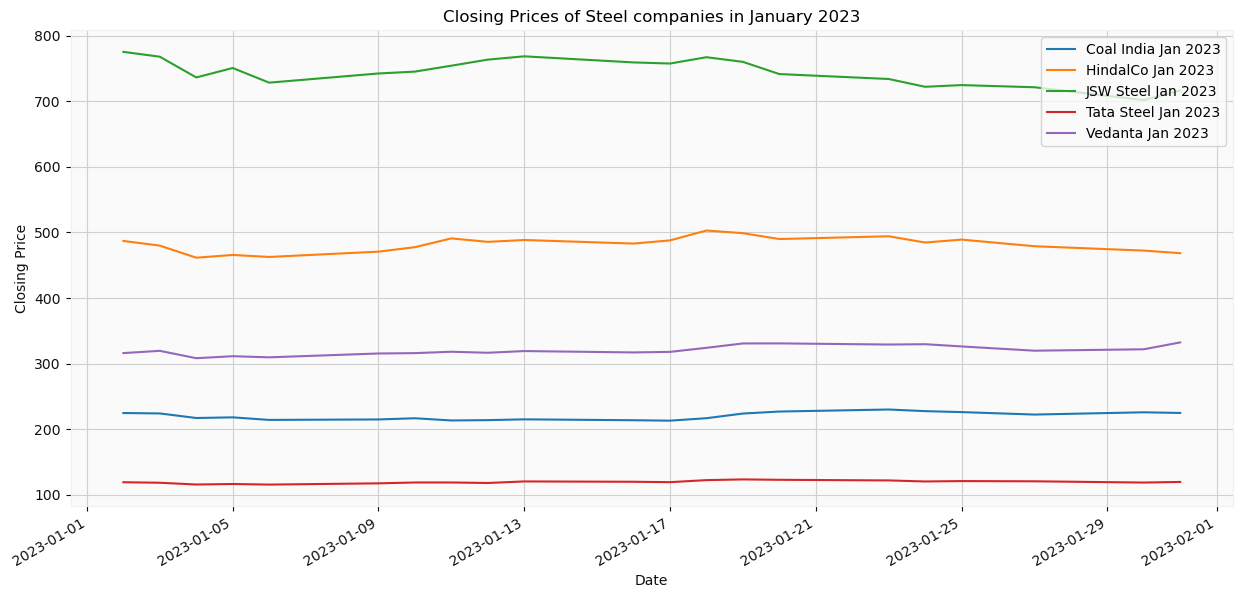

In [260]:
coal_data_test['Close'].loc['2023-01'].plot(label='Coal India Jan 2023', figsize=(15, 7))
hindalco_data_test['Close'].loc['2023-01'].plot(label='HindalCo Jan 2023')
jsw_data_test['Close'].loc['2023-01'].plot(label='JSW Steel Jan 2023')
tata_data_test['Close'].loc['2023-01'].plot(label='Tata Steel Jan 2023')
vedanta_data_test['Close'].loc['2023-01'].plot(label='Vedanta Jan 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Steel companies in January 2023')
plt.legend()

# Show the plot
plt.show()


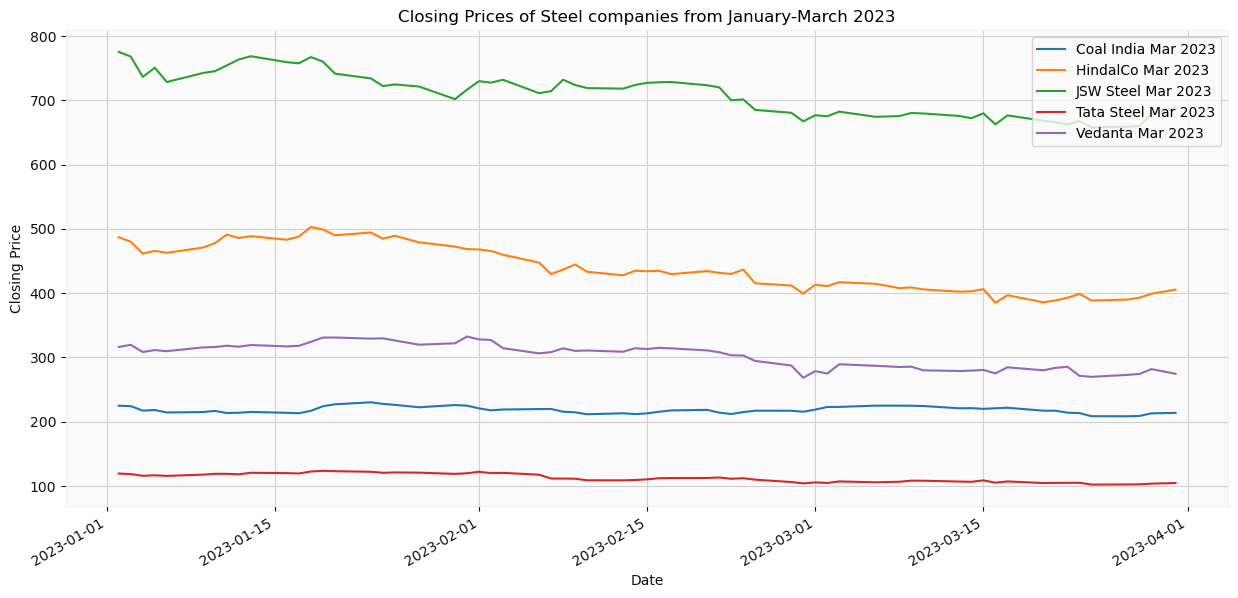

In [262]:
coal_data_test['Close'].plot(label='Coal India Mar 2023', figsize=(15, 7))
hindalco_data_test['Close'].plot(label='HindalCo Mar 2023')
jsw_data_test['Close'].plot(label='JSW Steel Mar 2023')
tata_data_test['Close'].plot(label='Tata Steel Mar 2023')
vedanta_data_test['Close'].plot(label='Vedanta Mar 2023')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Closing Prices of Steel companies from January-March 2023')
plt.legend()

# Show the plot
plt.show()


In [222]:
# Given data
num_of_shares = 1   
prev_price =  225.05
current_price = 224.75   
investment_amount = num_of_shares * prev_price
current_investment_value = num_of_shares* current_price

profit_gained = current_investment_value - investment_amount
print(f"Profit gained: ${profit_gained}")

Profit gained: $-0.30000000000001137


In [ ]:
# Given data
num_of_shares = 1   
prev_price =  225.05
current_price = 224.75   
investment_amount = num_of_shares * prev_price
current_investment_value = num_of_shares* current_price

profit_gained = current_investment_value - investment_amount
print(f"Profit gained: ${profit_gained}")

In [224]:
# Given data
num_of_shares = 1   
prev_price =  473.35
current_price = 487.05   
investment_amount = num_of_shares * prev_price
current_investment_value = num_of_shares* current_price

profit_gained = current_investment_value - investment_amount
print(f"Profit gained: ${profit_gained}")

Profit gained: $13.699999999999989


In [225]:
tata_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,%Change,20_sma,50_sma,200_sma
2954,2022-12-26,102.800003,105.550003,101.650002,105.000000,101.681297,33995681.0,2.689487,110.189999,106.317999,108.603475
2955,2022-12-27,106.650002,111.550003,105.849998,111.150002,107.636917,76033410.0,5.857145,110.442500,106.538999,108.524475
2956,2022-12-28,111.050003,112.300003,109.699997,110.000000,106.523270,50660601.0,-1.034640,110.560000,106.747999,108.446800
2957,2022-12-29,109.000000,112.000000,108.849998,111.750000,108.217957,51751642.0,1.590909,110.610000,106.969999,108.351200
2958,2022-12-30,112.900002,114.750000,112.099998,112.650002,109.089508,56048485.0,0.805371,110.642500,107.221999,108.263600


In [226]:
# Given data
num_of_shares = 1   
prev_price =  112.65
current_price = 119.25 
investment_amount = num_of_shares * prev_price
current_investment_value = num_of_shares* current_price

profit_gained = current_investment_value - investment_amount
print(f"Profit gained: ${profit_gained}")

Profit gained: $6.599999999999994
